In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

scanpy==1.7.2 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.6.2 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3


In [3]:
results_file = 'write/220429_testis_analysis.h5ad'

In [4]:
adata = sc.read_h5ad('write/testis_220304.h5ad')  

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


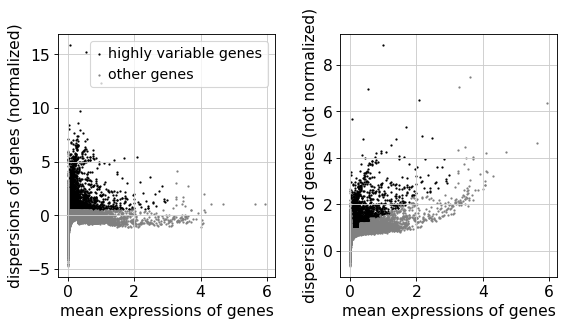

In [6]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [7]:
adata.raw = adata

In [8]:
adata = adata[:, adata.var.highly_variable]

In [9]:
adata

View of AnnData object with n_obs × n_vars = 4561 × 3065
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'doublet_info_colors', 'log1p', 'hvg'

In [10]:
sc.pp.regress_out(adata, ['total_counts' ,'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:12)


In [11]:
sc.pp.scale(adata, max_value=10)

In [12]:
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


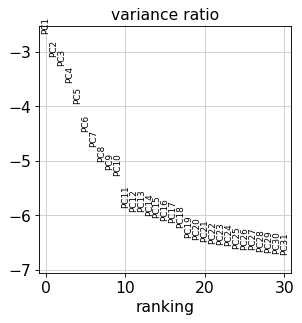

In [13]:
sc.pl.pca_variance_ratio(adata, log=True)

In [14]:
adata.write(results_file)
adata

AnnData object with n_obs × n_vars = 4561 × 3065
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'n_counts', 'doublet_scores', 'predicted_doublets', 'doublet_info'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'doublet_info_colors', 'log1p', 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'

In [15]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)

computing neighbors
    using 'X_pca' with n_pcs = 30
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)


In [16]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)


In [17]:
sc.tl.leiden(adata, resolution = 0.01, key_added = "leiden_0.01")

running Leiden clustering
    finished: found 4 clusters and added
    'leiden_0.01', the cluster labels (adata.obs, categorical) (0:00:00)


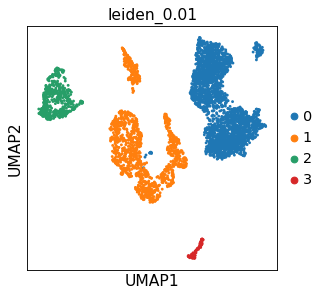

<Figure size 320x320 with 0 Axes>

In [18]:
sc.pl.umap(adata, color='leiden_0.01')
plt.savefig('leiden_0.01.png')
plt.savefig('leiden_0.01.jpg')
plt.show()

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:04)


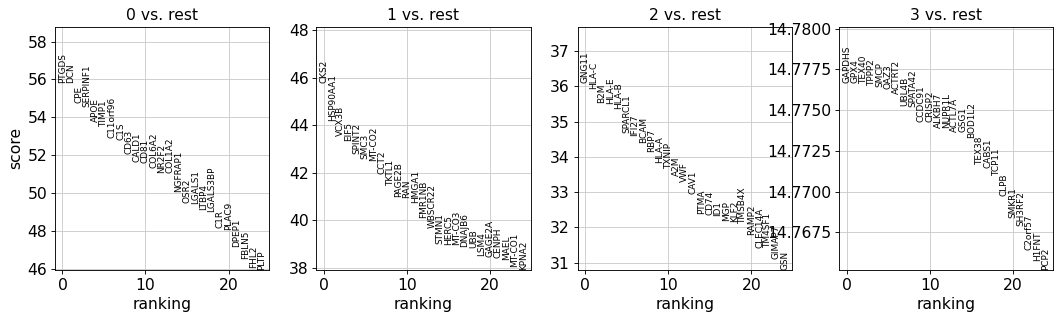

In [19]:
sc.tl.rank_genes_groups(adata, 'leiden_0.01', method='wilcoxon', key_added = "wilcoxon")
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key="wilcoxon")

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_leiden_0.01']`


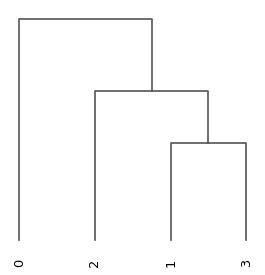

<AxesSubplot:>

In [20]:
sc.pl.dendrogram(adata, groupby = 'leiden_0.01')

In [21]:
marker_genes = {
    'Sertoli':['WT1'],
    'PTM':['ACTA2'],
    'LC':['IGF1'],
    'Endotherial':['CD34'],
    'Blood':['CD74'],
    #'Macrophage':['AIF1','CD68'],
    'Stroma':['SPARCL1'],
    #'Fibroblasts':['FSP1'],
    'PGC':['SOX17'],
    'PreSG':['MAGEA4'],
    'SSC':['STK31'],
    #'Progenitors':[ 'NANOS3', 'MAGEA4'],
    'Undiff SPG':['UTF1'],
    'Diff SPG':['SOHLH1'],
    'SPC':['SYCP3'],
    'St':['PRM1']
}

categories: 0, 1, 2, etc.
var_group_labels: Sertoli, PTM, LC, etc.


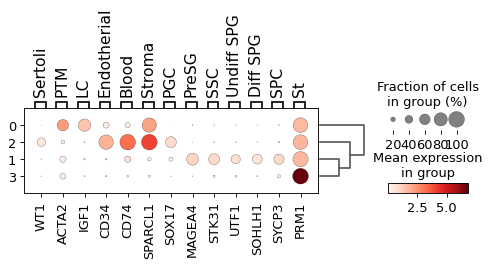

<Figure size 320x320 with 0 Axes>

In [22]:
sc.pl.dotplot(adata, marker_genes, 'leiden_0.01', dendrogram=True)
plt.savefig("leiden_0.01.png")

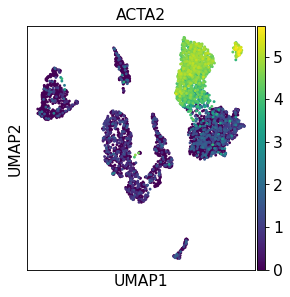

<Figure size 320x320 with 0 Axes>

In [23]:
# cluster 0 Ptm (smooth muscle cells)
sc.pl.umap(adata, color=['ACTA2'])
plt.savefig("ACTA2.png")

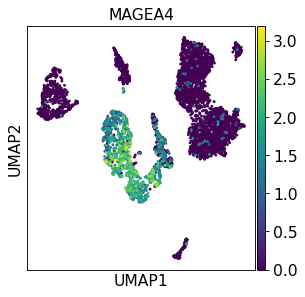

<Figure size 320x320 with 0 Axes>

In [24]:
# cluster 1 Sperm cell lineage
sc.pl.umap(adata, color=['MAGEA4'])
plt.savefig("MAGEA4.png")

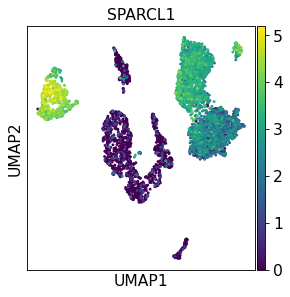

<Figure size 320x320 with 0 Axes>

In [25]:
# cluster 2 stromal cells (endothelial cells)
sc.pl.umap(adata, color=['SPARCL1'])
plt.savefig("SPARCL1.png")

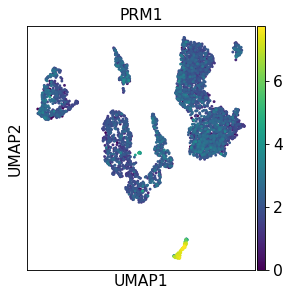

<Figure size 320x320 with 0 Axes>

In [26]:
# cluster 3 St
sc.pl.umap(adata, color=['PRM1'])
plt.savefig("PRM1.png")

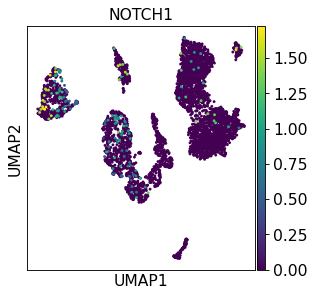

<Figure size 320x320 with 0 Axes>

In [27]:
sc.pl.umap(adata, color=['NOTCH1'])
plt.savefig("NOTCH1.png")

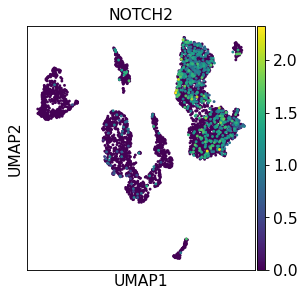

<Figure size 320x320 with 0 Axes>

In [28]:
sc.pl.umap(adata, color=['NOTCH2'])
plt.savefig("NOTCH2.png")

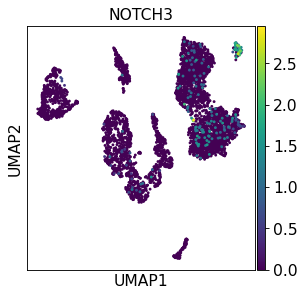

<Figure size 320x320 with 0 Axes>

In [29]:
sc.pl.umap(adata, color=['NOTCH3'])
plt.savefig("NOTCH3.png")

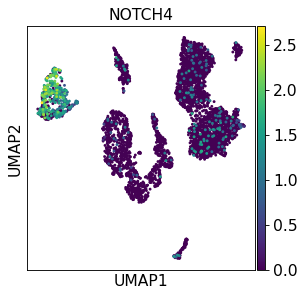

<Figure size 320x320 with 0 Axes>

In [30]:
sc.pl.umap(adata, color=['NOTCH4'])
plt.savefig("NOTCH4.png")

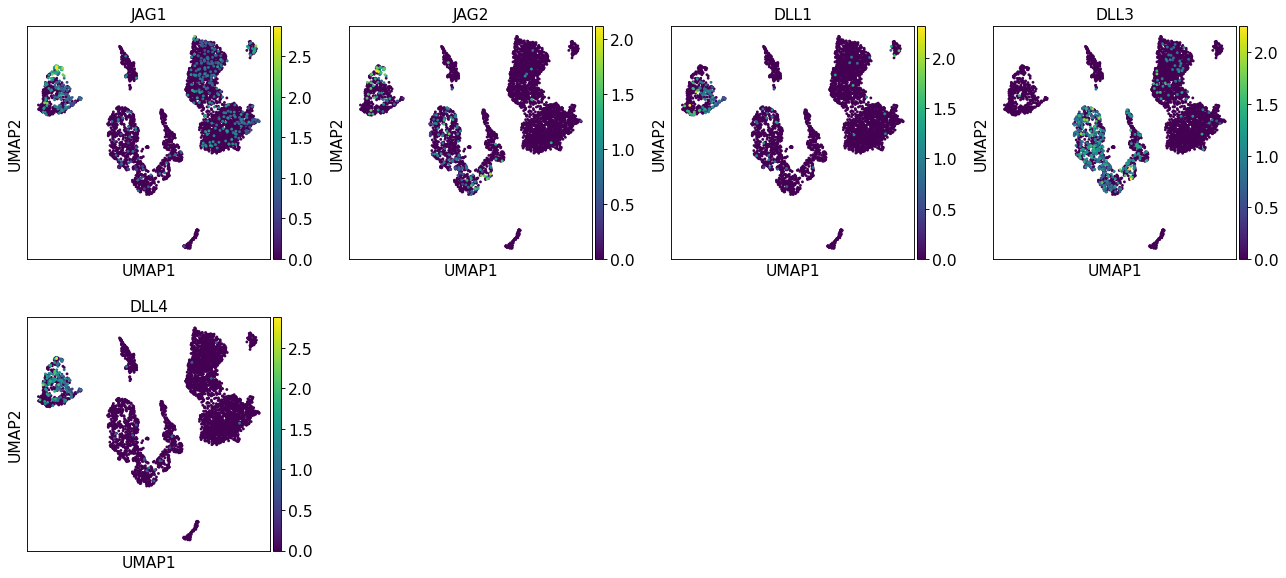

<Figure size 320x320 with 0 Axes>

In [31]:
sc.pl.umap(adata, color=['JAG1','JAG2','DLL1','DLL3','DLL4'])
plt.savefig("JAG1.png")
plt.savefig("JAG2.png")
plt.savefig("DLL1.png")
plt.savefig("DLL3.png")
plt.savefig("DLL4.png")

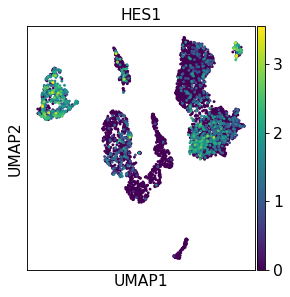

<Figure size 320x320 with 0 Axes>

In [32]:
sc.pl.umap(adata, color=['HES1'])
plt.savefig("HES1.png")

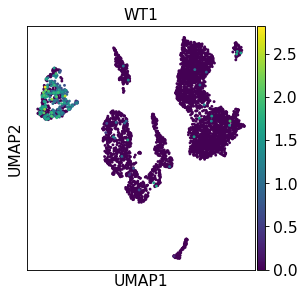

<Figure size 320x320 with 0 Axes>

In [33]:
sc.pl.umap(adata, color=['WT1'])
plt.savefig("WT1.png")

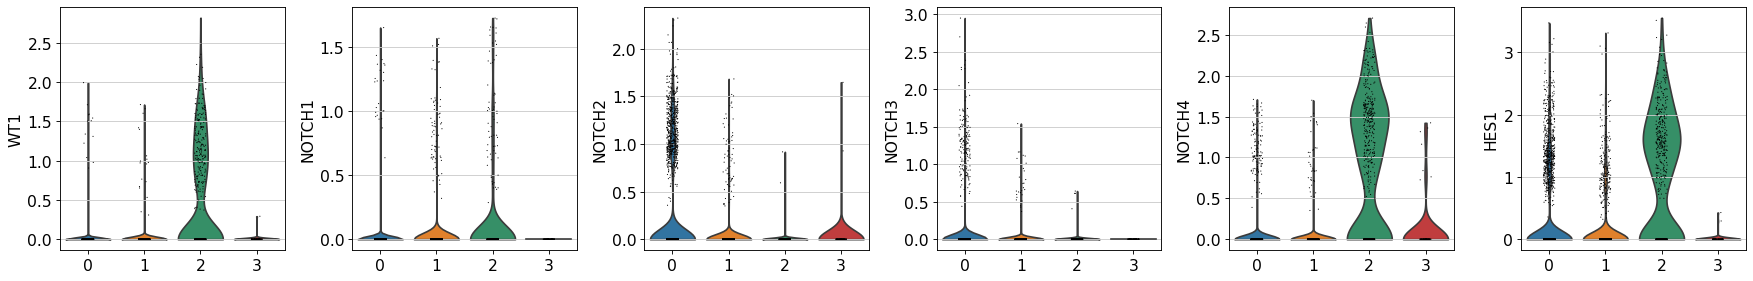

<Figure size 320x320 with 0 Axes>

In [34]:
sc.pl.violin(adata, ['WT1','NOTCH1','NOTCH2','NOTCH3','NOTCH4','HES1'], groupby='leiden_0.01', rotation = 0)
plt.savefig("WT1-0.01.png")
plt.savefig("NOTCH1-0.01.png")
plt.savefig("NOTCH2-0.01.png")
plt.savefig("NOTCH3-0.01.png")
plt.savefig("NOTCH4-0.01.png")
plt.savefig("HES1-0.01.png")

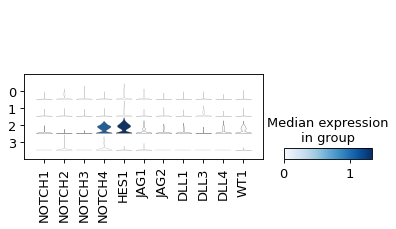

<Figure size 640x800 with 0 Axes>

In [35]:
sc.pl.stacked_violin(adata, ['NOTCH1','NOTCH2','NOTCH3','NOTCH4','HES1', 'JAG1','JAG2','DLL1','DLL3','DLL4','WT1'], groupby='leiden_0.01', rotation = 0)
plt.figure(figsize=(8,10))
plt.savefig("violin.png")

In [40]:
group0 = (sc.get.rank_genes_groups_df(adata, group = "0", key = "wilcoxon" )
          .set_index("names", drop=False))

In [41]:
group0.head()

,names,scores,logfoldchanges,pvals,pvals_adj
names,,,,,
PTGDS,PTGDS,55.824875,6.706648,0.0,0.0
DCN,DCN,55.802254,6.918137,0.0,0.0
CPE,CPE,54.744480,5.806252,0.0,0.0
SERPINF1,SERPINF1,54.571175,5.647474,0.0,0.0
APOE,APOE,53.758583,6.197887,0.0,0.0


In [42]:
group0.to_csv('220505_group0_wilcoxon.tsv', sep='\t', index = False)

In [43]:
group1 = (sc.get.rank_genes_groups_df(adata, group = "1", key = "wilcoxon" )
          .set_index("names", drop=False))
group1.to_csv('220505_group1_wilcoxon.tsv', sep='\t', index = False)

In [44]:
group2 = (sc.get.rank_genes_groups_df(adata, group = "2", key = "wilcoxon" )
          .set_index("names", drop=False))
group2.to_csv('220505_group2_wilcoxon.tsv', sep='\t', index = False)

In [45]:
group3 = (sc.get.rank_genes_groups_df(adata, group = "3", key = "wilcoxon" )
          .set_index("names", drop=False))
group3.to_csv('220505_group3_wilcoxon.tsv', sep='\t', index = False)